Predicción de la resistencia del concreto
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/15-neuralnet-strength-concrete.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/IPython-for-predictive-analytics/blob/master/15-neuralnet-strength-concrete.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/readme.md)

# Exploración

In [1]:
## Carga de los datos
## Todas las variables son numéricas
import pandas as pd
concrete = pd.read_csv('data/concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
## Información relevante de la resistencia
## summary(concrete$strength)
concrete.strength.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

In [3]:
## Se escalan todas las variables al rango [0, 1]
## para evitar problemas asociados a la escala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
concrete_norm = scaler.fit_transform(concrete)
concrete_norm

array([[1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.96748474],
       [1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.74199576],
       [0.52625571, 0.39649416, 0.        , ..., 0.        , 0.73901099,
        0.47265479],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.46663322, 0.07417582,
        0.26622649],
       [0.1303653 , 0.51947691, 0.        , ..., 0.48896136, 0.07417582,
        0.37922013],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.42022077, 0.07417582,
        0.37461069]])

In [8]:
## Se usa el 75% de los datos para entrenamiento
## concrete_train <- concrete_norm[1:773, ]
## concrete_test <- concrete_norm[774:1030, ]
concrete_train = concrete_norm[0:772, ]
concrete_test = concrete_norm[772:, ]
concrete_train_x = [x[0:8] for x in concrete_train]
concrete_test_x  = [x[0:8] for x in concrete_test]
concrete_train_y = [x[8] for x in concrete_train]
concrete_test_y  = [x[8] for x in concrete_test]

In [9]:
## El modelo se especifica tal como en los 
## modelos de regresión lineal
## concrete_model <- neuralnet(strength ~ cement + slag
##                             + ash + water + superplastic + 
##                             coarseagg + fineagg + age, 
##                             data = concrete_train)
## por defecto, el modelo tiene una neurona en la capa oculta
from sklearn.neural_network import MLPRegressor
concrete_model = MLPRegressor(hidden_layer_sizes=(1, ))
concrete_model.fit(concrete_train_x, concrete_train_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
## Se analiza el entrenamiento
## variable de salida
## summary(concrete_train$strength)

##      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
## 0.0000000 0.2639841 0.4163448 0.4303287 0.5839043 1.0000000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.2639841 0.4163448 0.4303287 0.5839043 1.0000000 

In [ ]:
## pronóstico del modelo para la muestra de 
## entrenamiento
## summary(unlist(concrete_model$net.result))

##       Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
## 0.07699212 0.25942314 0.46286797 0.43031943 0.60506805 0.67480659 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
0.07699212 0.25942314 0.46286797 0.43031943 0.60506805 0.67480659 

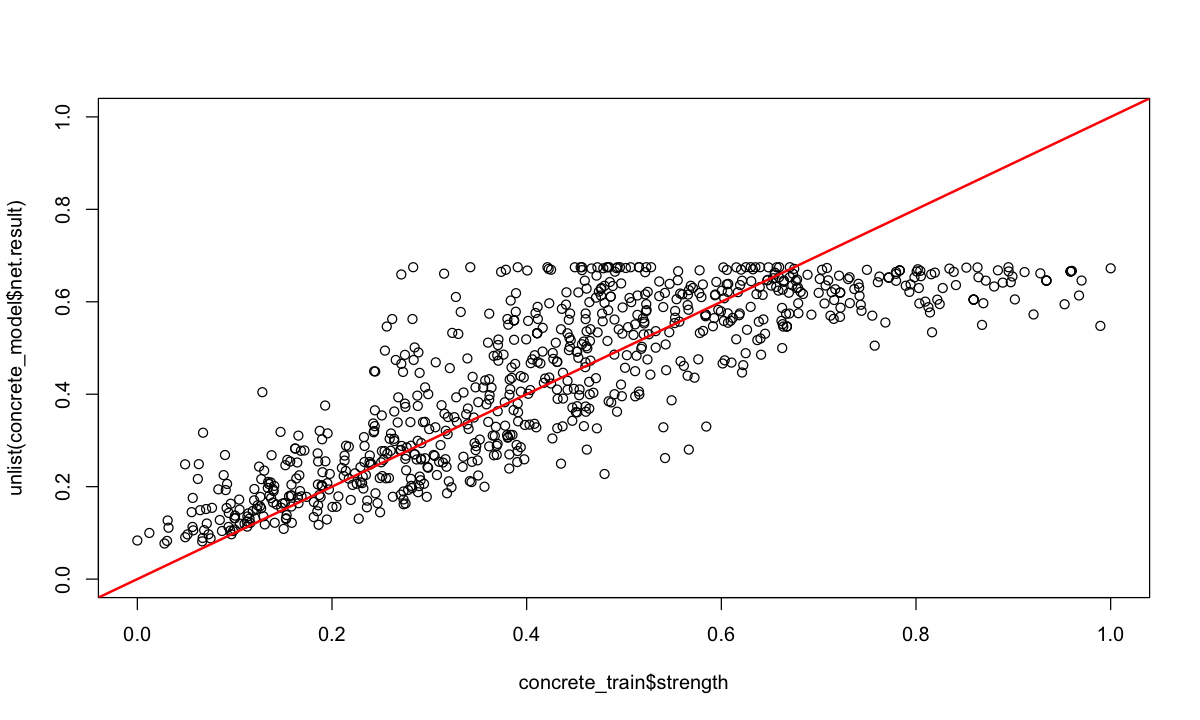

In [ ]:
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
## plot(concrete_train$strength, 
##      unlist(concrete_model$net.result),
##      xlim=c(0,1),
##      ylim=c(0,1))
## abline(a=0,b=1, col='red', lwd=2)

## plot without title

In [ ]:
## evaluación de la muestra de prueba
## model_results <- compute(concrete_model, concrete_test[1:8])
## predicted_strength <- model_results$net.result
## cor(predicted_strength, concrete_test$strength)

##      [,1]        
## [1,] 0.7217989153

0.7217989153


In [ ]:
## se define el error medio absoluto
## MAE <- function(actual, predicted) {
##     mean(abs(actual - predicted))
## }

In [ ]:
## MAE(predicted_strength, concrete_test$strength)

## [1] 0.08548632748

[1] 0.08548632748

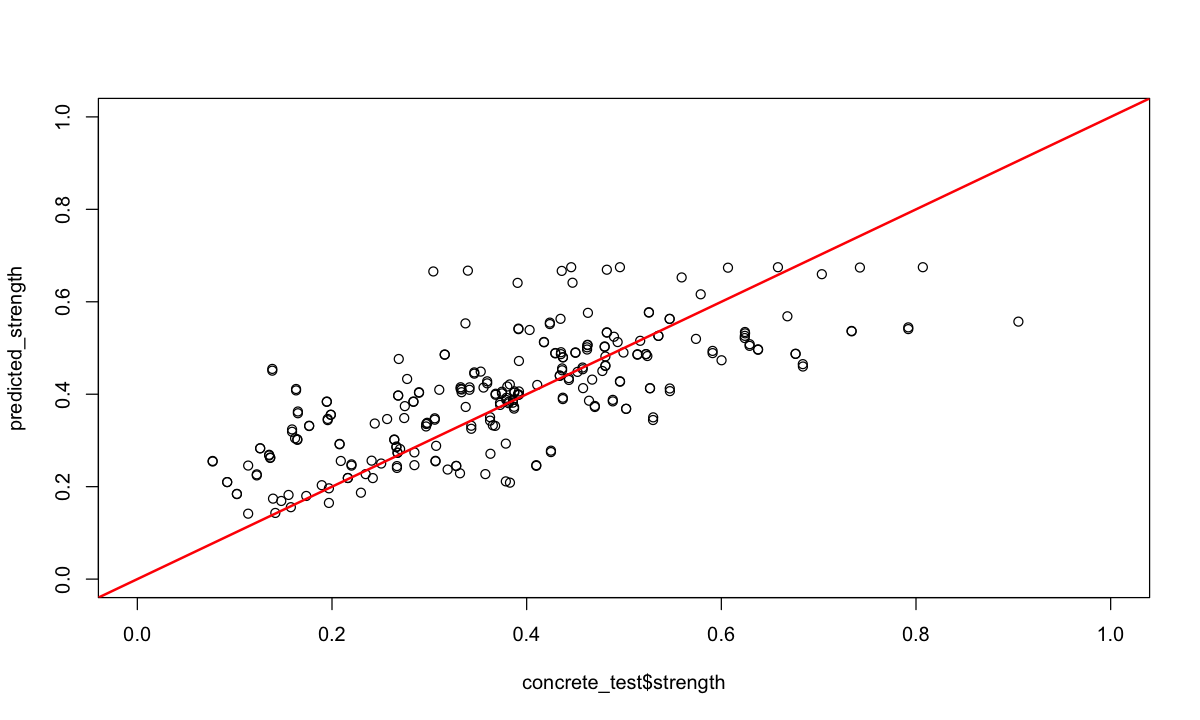

In [ ]:
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
## plot(concrete_test$strength, 
##      predicted_strength,
##      xlim=c(0,1),
##      ylim=c(0,1))
## abline(a=0,b=1, col='red', lwd=2)

## plot without title

# Mejora del modelo

In [ ]:
## concrete_model2 <- neuralnet(strength ~ cement + slag +
##                                ash + water + superplastic +
##                                coarseagg + fineagg + age,
##                                data = concrete_train, 
##                              hidden = 5) # cantidad de neuronas en la capa oculta

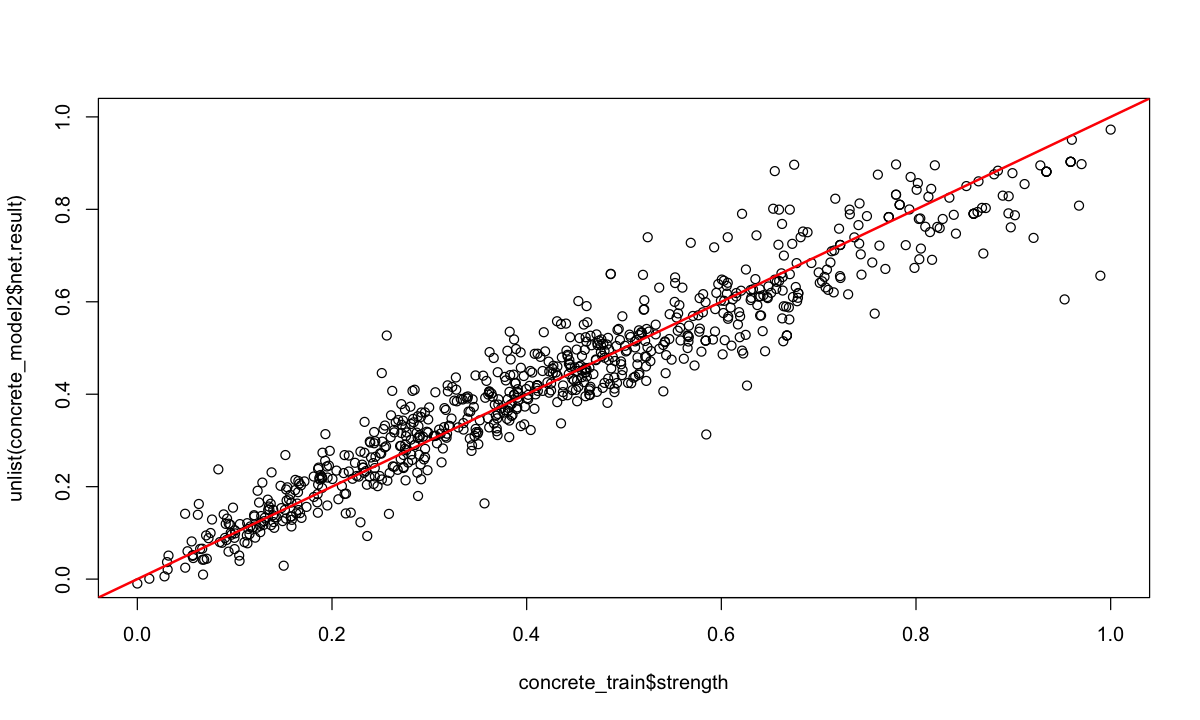

In [ ]:
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
## Note que el pronóstico es mucho mejor
## que en el caso anterior.
## plot(concrete_train$strength, 
##      unlist(concrete_model2$net.result),
##      xlim=c(0,1),
##      ylim=c(0,1))
## abline(a=0,b=1, col='red', lwd=2)

## plot without title

In [ ]:
## no genera la gráfica en jupyter!
## plot(concrete_model2)

In [ ]:
## model_results2 <- compute(concrete_model2, concrete_test[1:8])
## predicted_strength2 <- model_results2$net.result
## cor(predicted_strength2, concrete_test$strength)

##      [,1]        
## [1,] 0.8188078766

0.8188078766


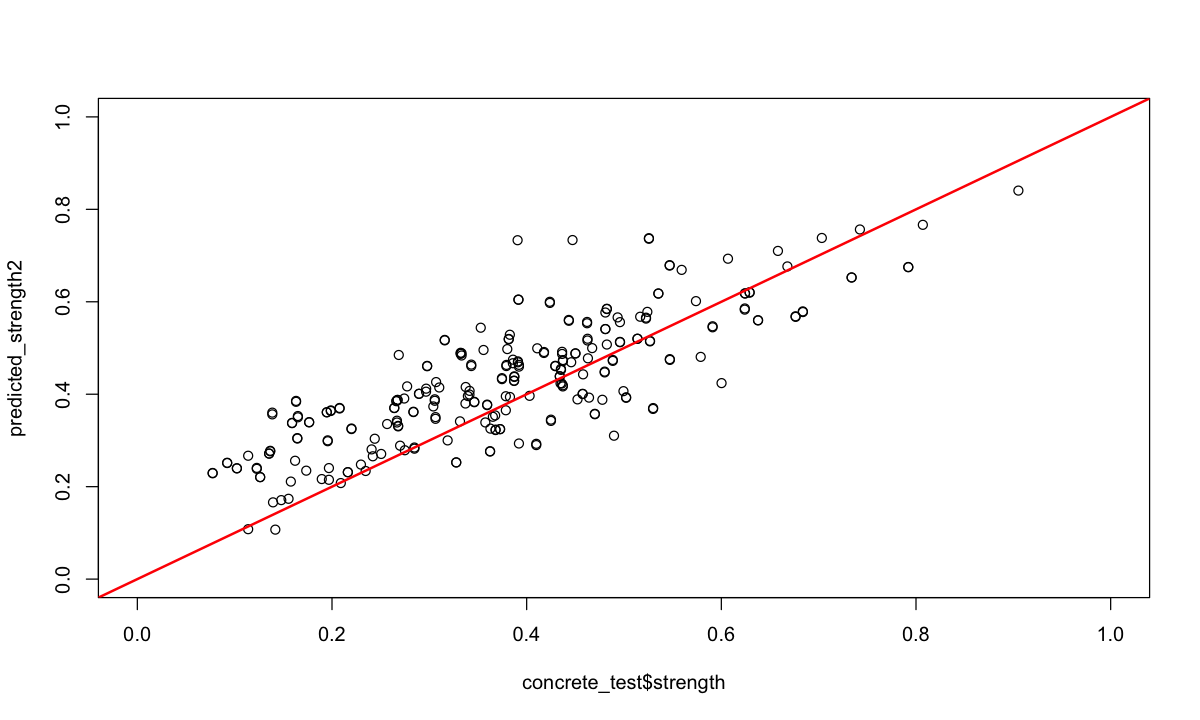

In [ ]:
## compare esta gráfica con la original
## plot(concrete_test$strength, 
##      predicted_strength2,
##      xlim=c(0,1),
##      ylim=c(0,1))
## abline(a=0,b=1, col='red', lwd=2)

## plot without title

**Ejercicio.--** Cómo se puede determinar el número óptimo de las neuronas de la capa oculta?

**Ejercicio.--** Este es un problema de optimización no lineal complejo con múltiples mínimos locales. Cómo debería realizarse la optimización del modelo?

---

Predicción de la resistencia del concreto
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/15-neuralnet-strength-concrete.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/IPython-for-predictive-analytics/blob/master/15-neuralnet-strength-concrete.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/IPython-for-predictive-analytics/blob/master/readme.md)